# COSE4 Deep Learning assignment 2 - Alina Seidel

## 7.1. From Fully Connected Layers to Convolutions

In [ ]:
#There is no code in this section

## 7.2. Convolutions for Images

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
#7.2.1
def corr2d(X, K):
  """Computer 2D cross-correlation."""
  h, w = K.shape
  Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
  for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
      Y[i, j] = (X[i:i + h, j:j +w] * K).sum()
  return Y

In [ ]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

In [ ]:
#7.2.2
class Conv2D(nn.Module):
  def __init__(self, kernal_size):
    super().__int__()
    self.weight = nn.Parameter(torch.rand(kernal_size))
    self.bias = nn.Parameter(torch.zeros(1))

  def forward(self, x):
    return corr2d(x, self.weight) + self.bias

In [ ]:
#7.2.3
X = torch.ones((6,8))
X[:,2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [ ]:
K = torch.tensor([[1.0, -1.0]])

In [ ]:
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [ ]:
corr2d(X.t(), K)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [ ]:
#7.2.4
conv2d = nn.LazyConv2d(1, kernel_size=(1, 2), bias=False)

X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
lr = 3e-2

for i in range(10):
  Y_hat = conv2d(X)
  l = (Y_hat - Y) ** 2
  conv2d.zero_grad()
  l.sum().backward()
  conv2d.weight.data[:] -= lr * conv2d.weight.grad
  if (i + 1) % 2 == 0:
    print(f'epoch {i + 1}, loss {l.sum():.3f}')

epoch 2, loss 14.087
epoch 4, loss 3.966
epoch 6, loss 1.322
epoch 8, loss 0.491
epoch 10, loss 0.192


In [ ]:
conv2d.weight.data.reshape((1,2))

tensor([[ 1.0304, -0.9412]])

## 7.3. Padding and Stride

In [ ]:
import torch
from torch import nn

In [ ]:
#7.3.1
def comp_conv2d(conv2d, X):
  X = X.reshape((1,1) + X.shape)
  Y = conv2d(X)
  return Y.reshape(Y.shape[2:])

conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1)
X = torch.rand(size=(8,8))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [ ]:
conv2d = nn.LazyConv2d(1, kernel_size=(5,3), padding=(2,1))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [ ]:
#7.3.2
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [ ]:
conv2d = nn.LazyConv2d(1, kernel_size=(3, 5), padding=(0,1), stride =(3,4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

## 7.4. Multiple Input and Multiple Output Channels

In [ ]:
import torch
from d2l import torch as d2l

In [ ]:
#7.4.1
def corr2d_multi_in(X, K):
  return sum(d2l.corr2d(x, k) for x, k in zip(X, K))

In [ ]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

In [ ]:
#7.4.2
def corr2d_multi_in_out(X, K):
  return torch.stack([corr2d_multi_in(X, k) for k in K], 0)

In [ ]:
K = torch.stack((K, K+1, K+2), 0)
K.shape

torch.Size([3, 2, 2, 2])

In [ ]:
corr2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

In [ ]:
#7.4.3
def corr2d_multi_in_out_1x1(X, K):
  c_i, h, w = X.shape
  c_o = K.shape[0]
  X = X.reshape((c_i, h *w))
  K = K.reshape((c_o, c_i))
  Y = torch.matmul(K, X)
  return Y.reshape((c_o, h, w))

In [ ]:
X = torch.normal(0,1,(3,3,3))
K = torch.normal(0,1,(2,3,1,1))
Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1 - Y2).sum()) < 1e-6

## 7.5. Pooling

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
#7.5.1
def pool2d(X, pool_size, mode='max'):
  p_h, p_w = pool_size
  Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
  for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
      if mode == 'max':
        Y[i, j] = X[i: i + p_h, j: j + p_w].max()
      elif mode == 'avg':
        Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
  return Y

In [ ]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [ ]:
pool2d(X, (2,2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

In [ ]:
#7.5.2
X = torch.arange(16, dtype=torch.float32).reshape((1,1,4,4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [ ]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [ ]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [ ]:
pool2d = nn.MaxPool2d((2,3), stride = (2,3), padding=(0,1))
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [ ]:
#7.5.3
X = torch.cat((X, X+1), 1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [ ]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

## 7.6. Convolutional Neural Networks (LeNet)

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
#7.6.1
def init_cnn(module):
  """Initialize weights for CNNs."""
  if type(module) == nn.Linear or type(module) == nn.Conv2d:
    nn.init.xavier_uniform_(module.weight)

class LeNet(d2l.Classifier):
  """The LeNet-5 model."""
  def __init__(self, lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.LazyLinear(120), nn.Sigmoid(),
        nn.LazyLinear(84), nn.Sigmoid(),
        nn.LazyLinear(num_classes))

In [3]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
  X = torch.randn(*X_shape)
  for layer in self.net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()
model.layer_summary((1,1,28,28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


C:\Users\aseid\miniconda3\envs\d2l\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


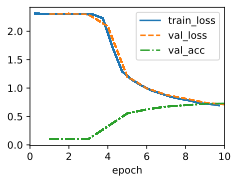

In [4]:
#7.6.2
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

## 8.2. Networks Using Blocks (VGG)

In [5]:
import torch
from torch import nn
from d2l import torch as d2l

In [6]:
#8.2.1
def vgg_block(num_convs, out_channels):
  layers = []
  for _ in range(num_convs):
      layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
      layers.append(nn.ReLU())
  layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
  return nn.Sequential(*layers)

In [7]:
#8.2.2
class VGG(d2l.Classifier):
  def __init__(self, arch, lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    conv_blks = []
    for (num_convs, out_channels) in arch:
      conv_blks.append(vgg_block(num_convs, out_channels))
    self.net = nn.Sequential(
      *conv_blks, nn.Flatten(),
      nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
      nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
      nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

In [8]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


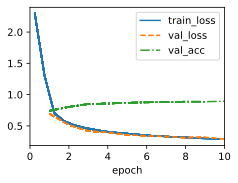

In [9]:
#8.2.3
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.6. Residual Networks (ResNet) and ResNeXt

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [ ]:
#8.6.2
class Residual(nn.Module):
  def __init__(self, num_channels, use_1x1conv=False, strides=1):
    super().__init__()
    self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                               stride=strides)
    self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
    if use_1x1conv:
      self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=strides)
    else:
      self.conv3 = None
    self.bn1 = nn.LazyBatchNorm2d()
    self.bn2 = nn.LazyBatchNorm2d()

  def forward(self, X):
    Y = F.relu(self.bn1(self.conv1(X)))
    Y = self.bn2(self.conv2(Y))
    if self.conv3:
      X = self.conv3(X)
    Y += X
    return F.relu(Y)

In [ ]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [ ]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

In [ ]:
#8.6.3
class ResNet(d2l.Classifier):
  def b1(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
    )

In [ ]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
  blk = []
  for i in range(num_residuals):
    if i == 0 and not first_block:
      blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
    else:
      blk.append(Residual(num_channels))
  return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
  super(ResNet, self).__init__()
  self.save_hyperparameters()
  self.net = nn.Sequential(self.b1())
  for i, b in enumerate(arch):
    self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
  self.net.add_module('last', nn.Sequential(
    nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
    nn.LazyLinear(num_classes)))
  self.net.apply(d2l.init_cnn)

In [ ]:
class ResNet18(ResNet):
  def __init__(self, lr=0.1, num_classes=10):
    super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)), lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


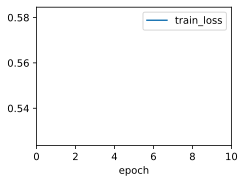

In [ ]:
#8.6.4
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## Discussions

### 7.1. From Fully Connected Layers to Convolutions

For high-dimensional perceptual data, MLP networks can become too large, hence the use of covolutional neural networks (CNNs)

7.1.1

- In the earliest layers, the network should respond similarly for the same patch regardless of where it appears in the image (translation invariance or translation equivariance)
- locality principle - the earliest layers should focus on local regions without regard for contents of the image in distant regions
- deeper layers should be able to capture longer-range features of the image

Exercises

4. No, I don't think convolutional layers might also be applicable for text data as their are many complex different relationships between words and the order they are in. For example, some sentences can say the exact same thing but with the words in a different order, so convolutional layers which rely on local areas might not be a suitable option. 

### 7.2. Convolutions for Images

7.2.1
- an input tensor and kernel tensor are combined to produce an output tensor through a cross-correlation operation
- the shape of the kernal window/convolution window is the height by width of the kernal
- the output size is the input size minus the convolution kernal size - need space to shift convolution kernel across image
- keep size uncahnged by adding sero padding around its boundary


7.2.2
- a convolutional layer cross-correlates the input and kernel and adds a scalar bias to produce an output
- the two paramteres are the kernal and the scalar biad

7.2.5
- since kernals are learned from data in deep learning, the outputs of convolutional layers remain unaffected no matter such layers perform either the strict convolution operations or the cross-correlation operations

7.2.6
- convolutional layer output (feature map) can be regarded as the learned representions in the spatial dimensions to the subsequent layer
- in CNNs, for any element x of some layer, its receptive field refers to all the elements that may affect the calculation sof x during the forward propagation
- receptive field may be larger than the input

7.2.7
- the core computation required for a convolutional layer is a cross-correlation operation
- if we have multiple input and multiple output layers, we are performing matrix-matrix operation between channels
- the computation is highly local


### 7.3. Padding and Stride

- if input shape is $n_h$ x $n_w$ and the convolution kernel shape is $k_h$ x $k_w$ then the output shape will be $(n_h - k_h + 1$) x (n_w - k_w + 1$)
- after applying succesive convloutions, outputs tend to be considerably smaller than the inputs
- therefore use padding to deal with this
- strided convolutions are another solution for some cases

7.3.1
- add extra pixels of filler around the boundary of input image to increase the size
- typically set the values of the extra pixels to zero
- to give the input and output the same heigth and width, set $p_h = k_h - 1$ and $p_w = k_w -1$
- if $k_h$ is odd, pad $p_h/2$ on both sides of height
- CNNs commonly use convolution kernels with odd height and width values to preserve dimesionality

7.3.2
- when computing cross-correlation, we start with the convolution window at the upper-left corner of the input tensor, and slide it over all locations both down and to the right
- can move window more than one element at a time
- output shape: $(n_h - k_h + p_h + s_h)/s_h$ x $(n_w - k_w + p_w + s_w)/s_w$

Exercises

1.

$(n_h - k_h + p_h + s_h)/s_h$ x $(n_w - k_w + p_w + s_w)/s_w$

(8 - 3 + 0 + 3)/3 x (8 - 5 + 1 + 4)/4

8/3 x 8/4

2 x 2

4.

It reduces the number of samples, and therefore increases computational effiency

### 7.4. Multiple Input and Multiple Output Channels

- when adding channels (color images have standard RGB channels), inputs and hidden representations become 3 dimensionial tensors
- each RGB input image has the shape 3 x h x w
- refer to this axis with a size of 3 as the channel dimension

7.4.1
- need to construct convolution kernel with the same number of channels as the input data
- since the input and convolution kernel both have $c_i$ channels, we can perform a cross-correlation operation on the two-dimensionial tensor of th input and the two-dimensionial tensor of the convolution kernel for each channel, adding the $c_i$ results together to yield a two-dimensionial tensor

7.4.2
- need to have mulitple channels at each layer
- we increase channel dimension as we go deeper into the neural network, downsampling to trade off spatial resolution for greater channel depth
- $c_i$ - number of input channels, $c_o$ - number of output chnnels
- tensor shape of $c_i$ x $k_h$ x $k_w$ for every output chnnel
- shape of convolution kernel is $c_o$ x $c_i$ x $k_h$ x $k_w$
- the result on each output channel is calculated from the convolution kernel corresponding to that output channel and takes input from all channels in the input tensor

7.4.3
- a 1 x 1 convolution window loses the ability of larger convolutional layers to recognise patterns consisting of interaction among adjacent elements in the height and width dimensions
- the only computation occurs on the channel dimension


7.4.4
- channels allow the CNN to reason with multiple features
- also offer trade-off between drastic paramter reduction arising from translation invariance and locality, and the need for expressive and diverse models in computer vision
- however this increases the size of the convolution and therefore increases calculation costs

Exercises

3.
if we double both the number of input and output channels, the number of calculations increases by a factor of 4. If we double the padding, then the height and width would increase and so cost would increase.

In [ ]:
#4
Y1, Y2

(tensor([[[ 1.3398, -0.8115,  0.0374],
          [ 1.4163, -1.4766,  3.1410],
          [ 1.1093, -0.6221,  0.5629]],
 
         [[ 1.6239, -1.1610, -0.5202],
          [ 0.6923, -1.1784,  3.1912],
          [ 1.6790, -1.0831,  0.7201]]]),
 tensor([[[ 1.3398, -0.8115,  0.0374],
          [ 1.4163, -1.4766,  3.1410],
          [ 1.1093, -0.6221,  0.5629]],
 
         [[ 1.6239, -1.1610, -0.5202],
          [ 0.6923, -1.1784,  3.1912],
          [ 1.6790, -1.0831,  0.7201]]]))

4.
The variables Y1 and Y2 are the same

### 7.5. Pooling

7.5.1
- poolong operators conist of a fixed-shape window that is slid over all regions in the input according to its stride, computing a single ouput for each location traversed
- the pooling layer contains no parameters, instead are deterministic, typically calculated either the maxiumum or average value of the elements in the pooling window
- average pooling - average over adjacent pixels to obtain a image with better signal-to-noise ratio
- max-pooling is generally preferable to average pooling
- we use output of convolutional layer as input for max-pooling

Exercises

5.
I expect max-pooling and average pooling to work differently, because average pooling considers all the neighbours to a pixel, while max-pooling gives the maximum value from the neighbours

### 7.6. Convolutional Neural Networks (LeNet)

7.6.1

LeNet
- consists of two parts; a convolutional encoder consisting of two convolutional layers and a dense block consisting of three fully connected layers
- in each convolutional block there is a convolution layer, a sigmoid activation function, and a subsequent average pooling operation
- each convolutional layer uses a 5 x 5 kernel and a sigmoid activation function
- the first convolutional layer has 6 output channels while the second has 16
- each 2 x 2 pooling operation (stride 2) reduces dimensionality by a factor of 4 via spatial downsampling
- convolutional block emits output with shape given by batch size, number of channel, height and width
- need to flatten each example in the minibatch by taking four-dimensional input and transforming in into the two-dimensional input expected by fully connected layers
- LeNet's dense block has 3 fully connected layers, with ouputs of 120, 84 and 10


7.6.2
- while CNNs have fewer parameters, they can still be more expensive to compute than similarly deep MLPs because each parameter participates in many more multiplications

Exercises

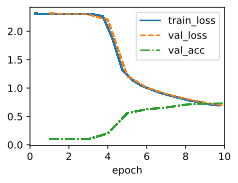

In [ ]:
#1
class LeNet_maxPool(d2l.Classifier):
  def __init__(self, lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.LazyLinear(120), nn.Sigmoid(),
        nn.LazyLinear(84), nn.Sigmoid(),
        nn.LazyLinear(num_classes))

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet_maxPool(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

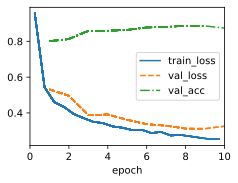

In [ ]:
class LeNet_maxPool(d2l.Classifier):
  def __init__(self, lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.LazyLinear(120), nn.ReLU(),
        nn.LazyLinear(84), nn.ReLU(),
        nn.LazyLinear(num_classes))

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet_maxPool(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

### 8.2. Networks Using Blocks (VGG)

- design of neural network architectures has grown from thinking in terms of individual layers, to whole layers, and now to blocks, repeating patterns of layers
- now entre trained models are repurposed for different albeit related tasks
- such pretrained models are typically called foundation models

8.2.1
- the basic building block of CNNs is a sequence of: a convolutional layer with padding to maintain resolution, a nonlinearity such as ReLU, a pooling layer such as max-pooling to reduce the resolution
- one problem of this approach is spatial resolution decreases quite rapidly
- use multiple convolutions between downsampling via max-pooling in the form of a block
- deep and narrow networks significantly outperform their shallow counterparts
- a VGG block consists of a sequence of convolutions with 3 x 3 kernels with a padding of 1 followed by a 2 x 2 max-pooling layer with a stride of 2(halves h and w after each block)

8.2.2
- the variable arch consists of a list of tuples (one per block), where each contains 2 values, the number of convolutional layers and the number of output channels
- VGG defines a family of networks

Exercises

2.

The 3 remaining layers are the max-pooling layers.

In [ ]:
#4
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(56, 56))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

### 8.6. Residual Networks (ResNet) and ResNeXt

8.6.1
- residual network (ResNet) - idea that every additional layer should more easily contain the identity function as one of its elements
- led to residual blocks, which are used in many different deep neural networks

8.6.2
- in a regular block, must directly learn the mapping f(x), while in a residual block, need to learn the residual mapping g(x) = f(x) - x, making the identiy mapping f(x) = x easier to learn
- ResNet has VGG's 3 x 3 convolutoional layer design
- the residual block has two 3 x 3 convolutional layers with the same number of output channels
- each convolutional layer is followed by a batch normalisation layer and a ReLU activation function
- then skip these two convoutional layers and add the input directly before the final ReLU activation function

8.6.4
- ResNet uses 4 modules made up of residual blocks, each of which uses several residual blocks with the same number of output channels
- in the first residual block for each of the subsequent modules, the number of channels is doubled and the height and width halved